# velocity of dwarf 1, with RT

In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

from NFW_Z import NFW_Z

%matplotlib inline

In [2]:
dm_290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_dm_5e8_rt_0290.txt")

dx_dm_290 = dm_290[:,4] / 1000 # converting pc to kpc
dy_dm_290 = dm_290[:,5] / 1000 # converting pc to kpc
dz_dm_290 = dm_290[:,6] / 1000 # converting pc to kpc
r_dm_290 = np.sqrt(dx_dm_290**2 + dy_dm_290**2 + dz_dm_290**2)

vx_dm_290 = dm_290[:,7]
vy_dm_290 = dm_290[:,8]
vz_dm_290 = dm_290[:,9]
vx_dm_COM = np.sum(vx_dm_290) / np.size(vx_dm_290)
vy_dm_COM = np.sum(vy_dm_290) / np.size(vy_dm_290)
vz_dm_COM = np.sum(vz_dm_290) / np.size(vz_dm_290)
vx_dm_new = vx_dm_290 - vx_dm_COM
vy_dm_new = vy_dm_290 - vy_dm_COM
vz_dm_new = vz_dm_290 - vz_dm_COM
v_dm_new = np.sqrt(vx_dm_new**2 + vy_dm_new**2 + vz_dm_new**2)

In [3]:
star_290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_star_5e8_rt_0290.txt")

dx_star_290 = star_290[:,4] / 1000 # converting pc to kpc
dy_star_290 = star_290[:,5] / 1000 # converting pc to kpc
dz_star_290 = star_290[:,6] / 1000 # converting pc to kpc
r_star_290 = np.sqrt(dx_star_290**2 + dy_star_290**2 + dz_star_290**2)

vx_star_290 = star_290[:,7]
vy_star_290 = star_290[:,8]
vz_star_290 = star_290[:,9]
vx_star_COM = np.sum(vx_star_290) / np.size(vx_star_290)
vy_star_COM = np.sum(vy_star_290) / np.size(vy_star_290)
vz_star_COM = np.sum(vz_star_290) / np.size(vz_star_290)
vx_star_new = vx_star_290 - vx_star_COM
vy_star_new = vy_star_290 - vy_star_COM
vz_star_new = vz_star_290 - vz_star_COM
v_star_new = np.sqrt(vx_star_new**2 + vy_star_new**2 + vz_star_new**2)

## CHAPTER 1:
## Speed of dark matter & star particles with respect to distance from dwarf center

In [4]:
'''Generate a radius array to work by later. unit: kpc'''

radius_array = np.arange(0.01, 11.7, 0.02)

In [5]:
'''Generate NFW fits based on different masses'''

NFW_1A = NFW_Z(3.13e8, 'Jeon')
r_s = NFW_1A.r_s(0.130, 30)
v_esc_1A = NFW_1A.v_esc(radius_array, 0.130, 30)

NFW_1B = NFW_Z(7.13e8, 'Jeon')
r_s = NFW_1B.r_s(0.130, 21)
v_esc_1B = NFW_1B.v_esc(radius_array, 0.130, 21)

NFW_1C = NFW_Z(1.11e9, 'Jeon')
r_s = NFW_1C.r_s(0.130, 19)
v_esc_1C = NFW_1C.v_esc(radius_array, 0.130, 19)

NFW_1D = NFW_Z(3.3e8, 'Jeon')
r_s = NFW_1D.r_s(0.130, 17)
v_esc_1D = NFW_1D.v_esc(radius_array, 0.130, 17)

NFW_Jeon = NFW_Z(1.9e8, 'Jeon')
r_s = NFW_Jeon.r_s(0.130, 30)
v_esc_Jeon = NFW_Jeon.v_esc(radius_array, 0.130, 30)

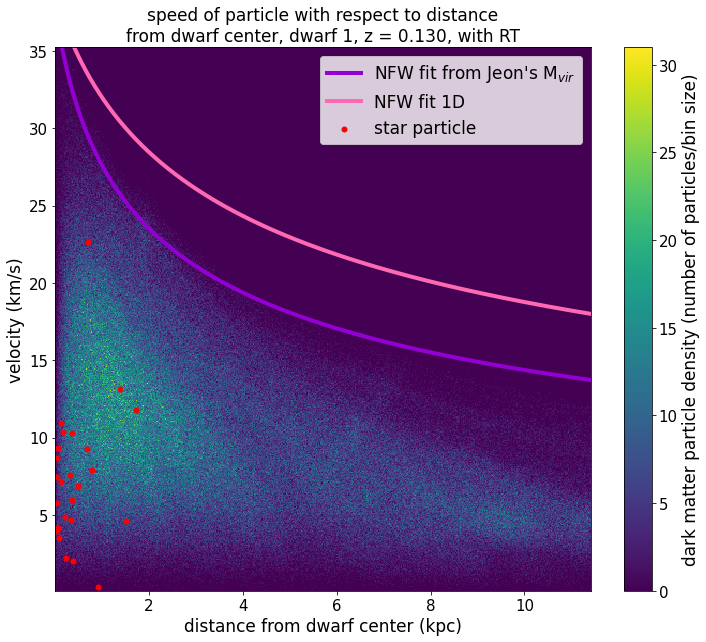

In [6]:
fig, ax = plt.subplots(figsize=[12, 10])

plt.hist2d(r_dm_290, v_dm_new, bins=500, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(label='dark matter particle density (number of particles/bin size)', size=17)
cbar.ax.tick_params(labelsize=15)

plt.scatter(r_star_290, v_star_new, 25, color='red', label='star particle')
plt.plot(radius_array, v_esc_Jeon, linewidth=4, color='darkviolet', label="NFW fit from Jeon's M$_{vir}$")
plt.plot(radius_array, v_esc_1D, linewidth=4, color='hotpink', label='NFW fit 1D')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=17)

plt.show()

## CHAPTER 2 
## Mean velocity and velocity dispersion profiles of dark matter particles

In [7]:
bin_size = 0.02

In [8]:
'''Compute the mean velocity in spherical volumes, 
along with the corresponding standard deviation.'''

mean_vx = np.zeros(np.size(radius_array))
mean_vy = np.zeros(np.size(radius_array))
mean_vz = np.zeros(np.size(radius_array))

sigma_vx = np.zeros(np.size(radius_array))
sigma_vy = np.zeros(np.size(radius_array))
sigma_vz = np.zeros(np.size(radius_array))

h = 0

for radius_value in radius_array:
    location = np.where((r_dm_290 < (radius_value + bin_size)))
    vx_values = vx_dm_new[location]
    vy_values = vy_dm_new[location]
    vz_values = vz_dm_new[location]
    vx_array = np.array(vx_values)
    vy_array = np.array(vy_values)
    vz_array = np.array(vz_values)
    mean_vx[h] = np.mean(vx_array)
    mean_vy[h] = np.mean(vy_array)
    mean_vz[h] = np.mean(vz_array)
    sigma_vx[h] = np.std(vx_array)
    sigma_vy[h] = np.std(vy_array)
    sigma_vz[h] = np.std(vz_array)
    h += 1

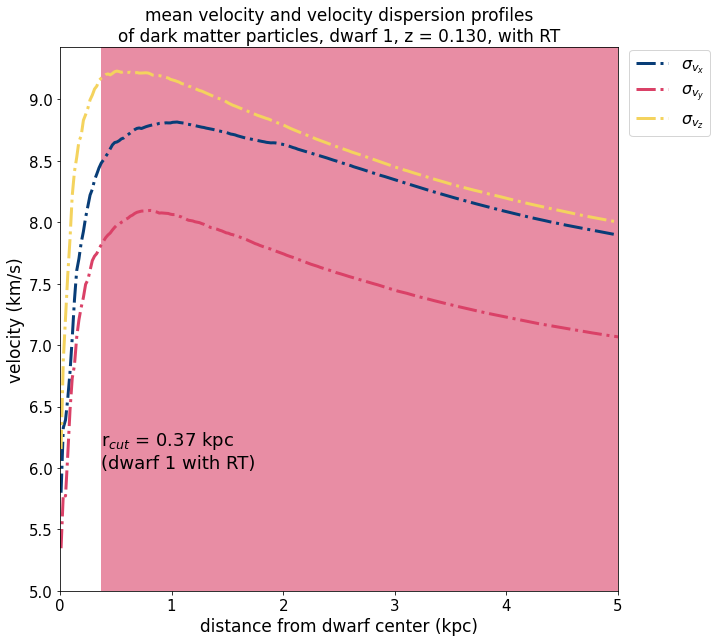

In [60]:
fig, ax = plt.subplots(figsize=[10, 10])

#plt.plot(radius_array, mean_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, sigma_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
#plt.plot(radius_array, mean_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, sigma_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
#plt.plot(radius_array, mean_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, sigma_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.axvspan(0.37, radius_array[-1], color='#DA4167', alpha=0.6, lw=0)
plt.text(0.37, 6, '''r$_{cut}$ = ''' + str(0.37) + ' kpc\n(dwarf 1 with RT)', fontsize=18, color='black')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0, 5)
plt.ylim(5)
plt.title('mean velocity and velocity dispersion profiles\nof dark matter particles, dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.savefig('DM_sigma_1RT.png', bbox_inches='tight')

## CHAPTER 3 
## Mean velocity and velocity dispersion profiles of star particles

In [10]:
'''Compute the mean velocity in spherical volumes, 
along with the corresponding standard deviation.'''

bin_size = 0.02

mean_star_vx = np.zeros(np.size(radius_array))
mean_star_vy = np.zeros(np.size(radius_array))
mean_star_vz = np.zeros(np.size(radius_array))

sigma_star_vx = np.zeros(np.size(radius_array))
sigma_star_vy = np.zeros(np.size(radius_array))
sigma_star_vz = np.zeros(np.size(radius_array))

j = 0

for radius_value in radius_array:
    location = np.where((r_star_290 < (radius_value + bin_size)))
    vx_values = vx_star_new[location]
    vy_values = vy_star_new[location]
    vz_values = vz_star_new[location]
    vx_array = np.array(vx_values)
    vy_array = np.array(vy_values)
    vz_array = np.array(vz_values)
    mean_star_vx[j] = np.mean(vx_array)
    mean_star_vy[j] = np.mean(vy_array)
    mean_star_vz[j] = np.mean(vz_array)
    sigma_star_vx[j] = np.std(vx_array)
    sigma_star_vy[j] = np.std(vy_array)
    sigma_star_vz[j] = np.std(vz_array)
    j += 1

C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


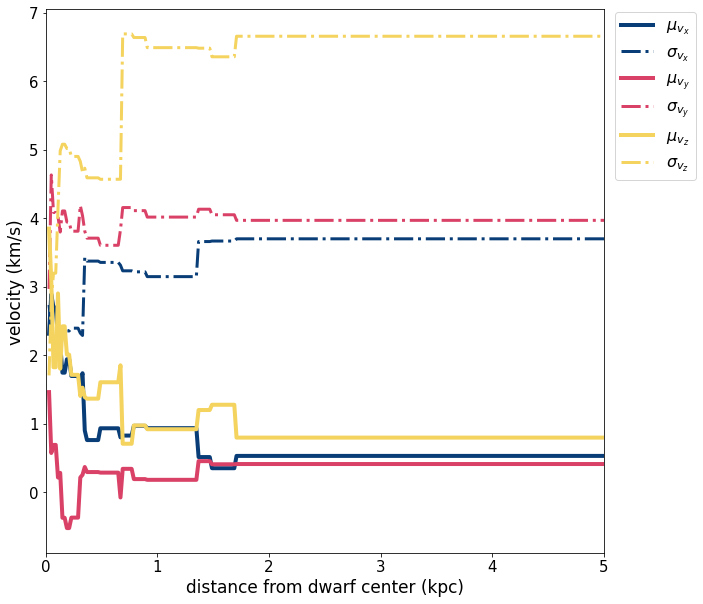

In [11]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mean_star_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, sigma_star_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(radius_array, mean_star_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, sigma_star_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(radius_array, mean_star_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, sigma_star_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0,5)
#plt.title('mean velocity and velocity dispersion profiles\nof star particles, dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.show()

# CHAPTER 4 
## Mass profile of stars only. At which radius is the mass enclosed 1/2 of the total mass in stars?

In [12]:
'''Read in the star particle mass info.'''

star_mass_290 = star_290[:,11]

In [13]:
'''Generate the mass profile.'''

bin_size = 0.02

mass_prof_stars = np.zeros(np.size(radius_array))
h = 0
for radius_value in radius_array:
    particles = np.where((r_star_290 < (radius_value + bin_size)))
    masses_in_here = np.sum(star_mass_290[particles])
    mass_prof_stars[h] = masses_in_here
    h += 1

In [14]:
'''Where is the mass enclosed closest to 1/2 of the total star particle mass?'''

M_tot = mass_prof_stars[np.size(mass_prof_stars) - 1]
M_half = (1/2) * M_tot

print(M_tot)
print(M_half)

closest = (np.abs(mass_prof_stars - M_half)).argmin()
r_half = radius_array[closest]

Re = r_half * (3/4)
print(Re)

closest_Re = (np.abs(radius_array - Re)).argmin()
Re_mass = mass_prof_stars[closest_Re]

print(Re_mass)

6494.741999999999
3247.3709999999996
0.11249999999999999
2674.073


In [15]:
stdev_x = np.zeros(np.size(radius_array))
stdev_y = np.zeros(np.size(radius_array))
stdev_z = np.zeros(np.size(radius_array))

u = 0
bin_size = 0.02

def weighted_mean(v, mass):
    return np.sum(v * mass) / np.sum(mass)

def weighted_stdev(v, mass, v_mean):
    unsquared = (np.sum(mass * (v - v_mean)**2)) / np.sum(mass)
    return np.sqrt(unsquared)

for radius_value in radius_array:
    where = np.where((r_star_290 < (radius_value + bin_size)))
    
    vx = vx_star_new[where]
    vy = vy_star_new[where]
    vz = vz_star_new[where]

    mass_in_here = star_mass_290[where]

    weighted_mean_vx = weighted_mean(vx, mass_in_here)
    weighted_mean_vy = weighted_mean(vy, mass_in_here)
    weighted_mean_vz = weighted_mean(vz, mass_in_here)
    
    stdev_x[u] = weighted_stdev(vx, mass_in_here, weighted_mean_vx)
    stdev_y[u] = weighted_stdev(vy, mass_in_here, weighted_mean_vy)
    stdev_z[u] = weighted_stdev(vz, mass_in_here, weighted_mean_vz)
    
    u += 1

<ipython-input-15-7bae7ff7e844>:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(v * mass) / np.sum(mass)
<ipython-input-15-7bae7ff7e844>:12: RuntimeWarning: invalid value encountered in double_scalars
  unsquared = (np.sum(mass * (v - v_mean)**2)) / np.sum(mass)


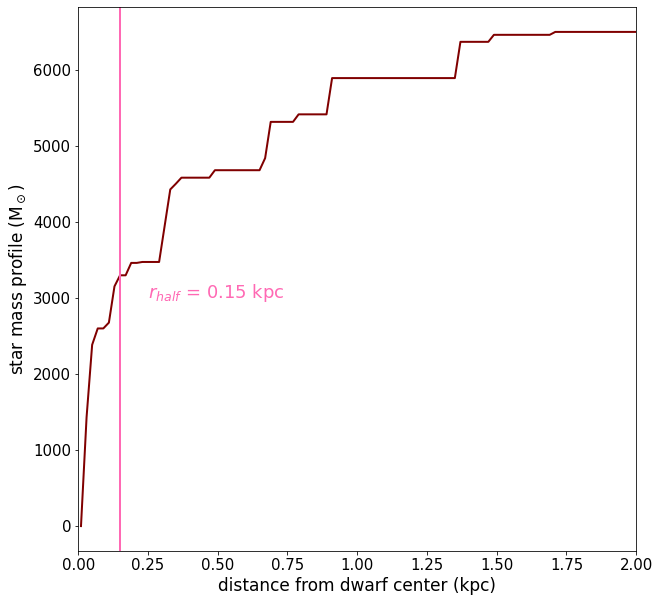

In [16]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mass_prof_stars, 'maroon', linewidth=2)

plt.axvline(r_half, color='hotpink', linewidth=2)

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('star mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xlim(0,2)
#plt.title('mass profile of only the stars\nin dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.text(r_half + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

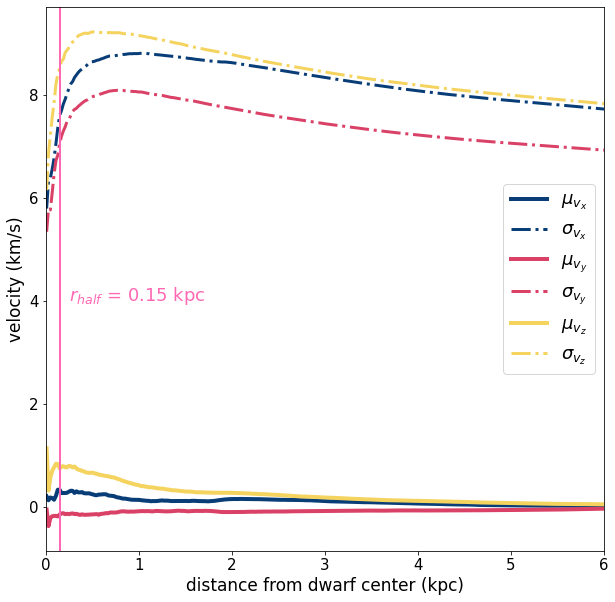

In [42]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mean_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, sigma_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(radius_array, mean_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, sigma_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(radius_array, mean_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, sigma_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.axvline(r_half, color='hotpink', linewidth=2)
plt.text(r_half + 0.1, 4, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0, 6)
#plt.title('mean velocity and velocity dispersion profiles\nof dark matter particles, dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right', fontsize=18, markerscale=2)

plt.show()

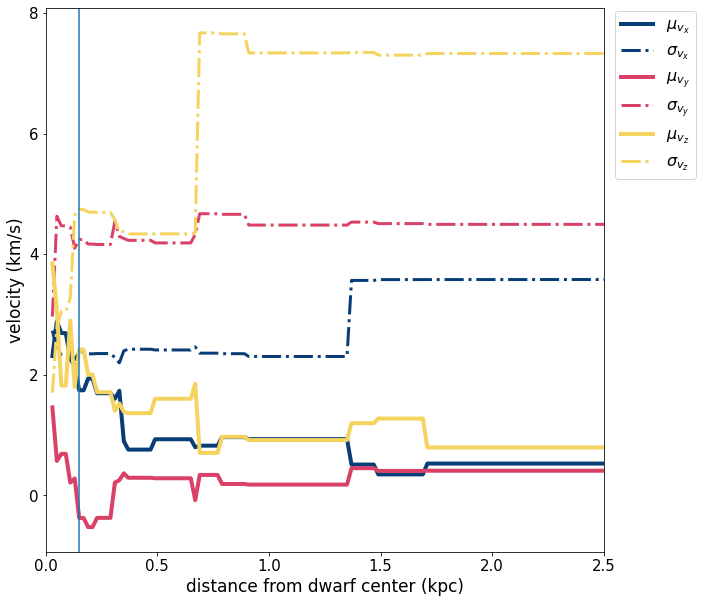

In [18]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mean_star_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, stdev_x, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(radius_array, mean_star_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, stdev_y, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(radius_array, mean_star_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, stdev_z, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.axvline(0.15)

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0,2.5)
#plt.title('mean velocity and weighted velocity dispersion profiles\nof star particles, dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.savefig('star_weighted_sigma_1RT.png', bbox_inches="tight")

# CHAPTER 5
## As inferred from the velocity dispersion, find the mass enclosed within r<sub>half<sub>

In [19]:
'''Generate the mass profile from the dark matter particles.'''

mass_prof_dm = np.zeros(np.size(radius_array))
h = 0
for radius_value in radius_array:
    particles = np.where((r_dm_290 < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_prof_dm[h] = how_many_particles * 500
    h += 1

In [20]:
'''Find the velocity dispersion of the star profiles within r_half.'''

sigma_star_vx_half = stdev_x[closest]
sigma_star_vy_half = stdev_y[closest]
sigma_star_vz_half = stdev_z[closest]

In [21]:
G = 4.3009e-3 # pc*(km/s)^2 / Msun
M_real = mass_prof_dm[closest]

M_wolf = lambda sigma : 3 * (sigma)**2 * (r_half*1000) / G

M_half_x_wolf = M_wolf(sigma_star_vx_half)
M_half_y_wolf = M_wolf(sigma_star_vy_half)
M_half_z_wolf = M_wolf(sigma_star_vz_half)

M_ratio_x = M_half_x_wolf / M_real
M_ratio_y = M_half_y_wolf / M_real
M_ratio_z = M_half_z_wolf / M_real

print(mass_prof_dm[closest])
print(M_half_x_wolf)
print(M_half_y_wolf)
print(M_half_z_wolf)

print(round(M_ratio_x, 3), round(M_ratio_y, 3), round(M_ratio_z, 3))

3682500.0
592724.608888107
1883554.663836731
2353181.2934895903
0.161 0.511 0.639


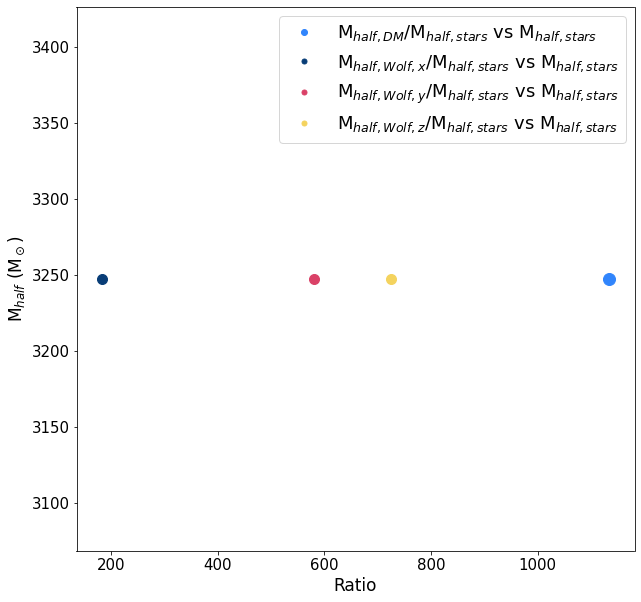

In [22]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(M_real / M_half, M_half, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
plt.plot(M_half_x_wolf / M_half, M_half, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
plt.plot(M_half_y_wolf / M_half, M_half, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
plt.plot(M_half_z_wolf / M_half, M_half, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')

plt.xlabel('Ratio', fontsize=17)
plt.ylabel('M$_{half}$ (M$_\odot$)', fontsize=17) # using LATEX here!

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=18, markerscale=0.5)

# CHAPTER 6
## Figuring out a M<sub>wolf</sub> function

In [23]:
def Wolf_mass(r, sigma):
    M_wolf = 3 * (sigma)**2 * (r*1000) / G
    return M_wolf

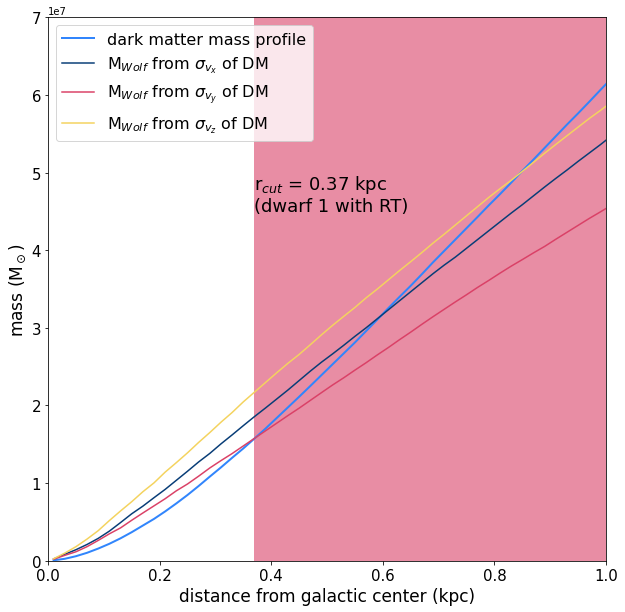

In [61]:
mass_profile = np.zeros(np.size(radius_array))
h = 0
for radius_value in radius_array:
    particles = np.where((r_dm_290 < (radius_value + 0.02)))
    how_many_particles = np.size(particles)
    mass_profile[h] = how_many_particles * 500
    h += 1

plt.figure(figsize=(10,10))

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('mass (M$_\odot$)', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(radius_array, mass_profile, color='#3185FC', linewidth=2, label="dark matter mass profile")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_vx), color='#083D77', \
         label="M$_{Wolf}$ from $\sigma_{v_x}$ of DM")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_vy), color='#DA4167', \
         label="M$_{Wolf}$ from $\sigma_{v_y}$ of DM")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_vz), color='#F4D35E', \
         label="M$_{Wolf}$ from $\sigma_{v_z}$ of DM")

#plt.axvline(r_half, color='hotpink', linewidth=2)
#plt.axvline(0.60, color='#083D77', linewidth=1, linestyle='-.') #dark matter intersects sigma_vx
#plt.axvline(0.37, color='#DA4167', linewidth=1, linestyle='-.') #dark matter intersects sigma_vy
#plt.axvline(0.84, color='#F4D35E', linewidth=1, linestyle='-.') #dark matter intersects sigma_vz

plt.axvspan(0.37, radius_array[-1], color='#DA4167', alpha=0.6, lw=0)
plt.text(0.37, 4.5e7, '''r$_{cut}$ = ''' + str(0.37) + ' kpc\n(dwarf 1 with RT)', fontsize=18, color='black')

#plt.text(r_half + 0.05, 0.5*1e8, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')

plt.xlim(0, 1)
plt.ylim(0, 0.7e8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=16, markerscale=2)

#plt.xscale('log')
#plt.yscale('log')   

plt.savefig('DMWolf_1RT.png', bbox_inches='tight')

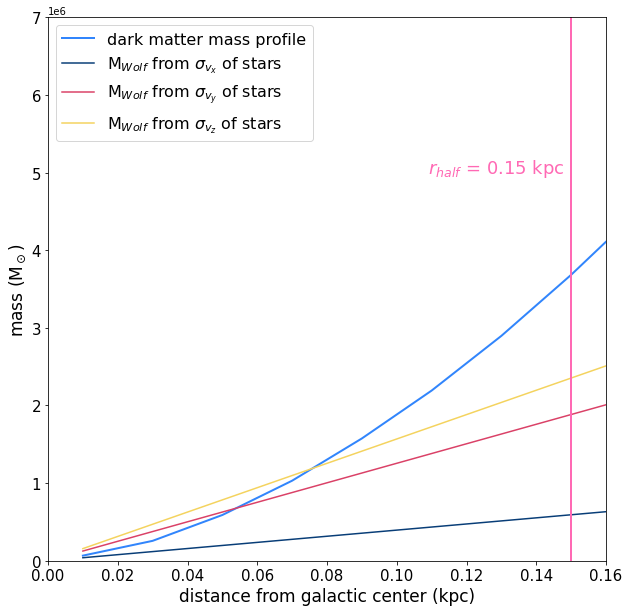

In [26]:
plt.figure(figsize=(10,10))

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('mass (M$_\odot$)', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(radius_array, mass_profile, color='#3185FC', linewidth=2, label="dark matter mass profile")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_star_vx_half), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_star_vy_half), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_star_vz_half), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")

plt.axvline(r_half, color='hotpink', linewidth=2)
plt.text(r_half - 0.041, 5*1e6, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')

#plt.xlim(0, 11.3)
plt.xlim(0, 0.16)
plt.ylim(0, 0.7e7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=16, markerscale=2)

#plt.xscale('log')
#plt.yscale('log')   

plt.show()

In [27]:
'''Find the velocity dispersion of the star within Re.'''

sigma_star_vx_Re = stdev_x[closest_Re]
sigma_star_vy_Re = stdev_y[closest_Re]
sigma_star_vz_Re = stdev_z[closest_Re]

'''Find the stellar mass enclosed within Re.'''

mass_in_Re = mass_prof_stars[closest_Re]

print(np.array([sigma_star_vx_Re, sigma_star_vy_Re, sigma_star_vz_Re]), mass_in_Re)

[2.37652727 4.44812776 3.27161215] 2674.073


In [28]:
print(np.array([sigma_star_vx_half, sigma_star_vy_half, sigma_star_vz_half]))
print(np.array([M_half, M_half, M_half]))

[2.38012571 4.2428974  4.74243197]
[3247.371 3247.371 3247.371]


In [29]:
G = 4.3009e-3 # pc*(km/s)^2 / Msun
M_real = mass_prof_dm[closest] # M_half_DM

M_walker = lambda sigma : (5/2) * (sigma)**2 * (Re*1000) / G

M_half_x_walker = M_walker(sigma_star_vx_Re)
M_half_y_walker = M_walker(sigma_star_vy_Re)
M_half_z_walker = M_walker(sigma_star_vz_Re)

M_ratio_x = M_half_x_walker / M_real
M_ratio_y = M_half_y_walker / M_real
M_ratio_z = M_half_z_walker / M_real

print(mass_prof_dm[closest])
print(M_half_x_walker)
print(M_half_y_walker)
print(M_half_z_walker)

3682500.0
369333.575984452
1293861.2072023486
699933.5481993936
